In [1]:
import requests
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import pandas as pd
#import folium

%matplotlib inline

**Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
params = {
    '$limit': 50000,
    'query_text': 'maps',
}

In [3]:
response = requests.get(endpoint, params = params)
response

<Response [200]>

In [4]:
res = response.json()
res

[{'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'February',
  'year': '2014',
  'query_count': '140',
  'query_text': 'maps'},
 {'month_name': 'March',
  'year': '2014',
  'query_count': '144',
  'query_text': 'maps'},
 {'month_name': 'April',
  'year': '2014',
  'query_count': '152',
  'query_text': 'maps'},
 {'month_name': 'May',
  'year': '2014',
  'query_count': '119',
  'query_text': 'maps'},
 {'month_name': 'June',
  'year': '2014',
  'query_count': '121',
  'query_text': 'maps'},
 {'month_name': 'July',
  'year': '2014',
  'query_count': '121',
  'query_text': 'maps'},
 {'month_name': 'August',
  'year': '2014',
  'query_count': '118',
  'query_text': 'maps'},
 {'month_name': 'September',
  'year': '2014',
  'query_count': '115',
  'query_text': 'maps'},
 {'month_name': 'October',
  'year': '2014',
  'query_count': '100',
  'query_text': 'maps'},
 {'month_name': 'November',
  'year': '2014',
  'query_count': '82',
  'q

In [5]:
q1_df = pd.DataFrame(res)
q1_df

,month_name,year,query_count,query_text,month
0,January,2014,97,maps,NaN
1,February,2014,140,maps,NaN
2,March,2014,144,maps,NaN
3,April,2014,152,maps,NaN
4,May,2014,119,maps,NaN
...,...,...,...,...,...
74,June,2020,136,maps,6
75,August,2020,125,maps,8
76,October,2020,127,maps,10
77,November,2020,86,maps,11


In [6]:
q1_df

,month_name,year,query_count,query_text,month
0,January,2014,97,maps,NaN
1,February,2014,140,maps,NaN
2,March,2014,144,maps,NaN
3,April,2014,152,maps,NaN
4,May,2014,119,maps,NaN
...,...,...,...,...,...
74,June,2020,136,maps,6
75,August,2020,125,maps,8
76,October,2020,127,maps,10
77,November,2020,86,maps,11


In [12]:
q1_df['month_year'] = q1_df['month_name'] + ' ' + q1_df['year']
q1_df['date_time'] = q1_df['month_year'].astype('datetime64')
q1_df

,month_name,year,query_count,query_text,month,month_year,date_time
0,January,2014,97,maps,NaN,January 2014,2014-01-01
1,February,2014,140,maps,NaN,February 2014,2014-02-01
2,March,2014,144,maps,NaN,March 2014,2014-03-01
3,April,2014,152,maps,NaN,April 2014,2014-04-01
4,May,2014,119,maps,NaN,May 2014,2014-05-01
...,...,...,...,...,...,...,...
74,June,2020,136,maps,6,June 2020,2020-06-01
75,August,2020,125,maps,8,August 2020,2020-08-01
76,October,2020,127,maps,10,October 2020,2020-10-01
77,November,2020,86,maps,11,November 2020,2020-11-01


In [13]:
convert_dict = {'month_name': object,
              'year': int,
              'query_count': int,
              'query_text': object,
              'month': object}


In [14]:
q1_df = q1_df.astype(convert_dict)
print(q1_df.dtypes)

month_name             object
year                    int32
query_count             int32
query_text             object
month                  object
month_year             object
date_time      datetime64[ns]
dtype: object


Text(0.5, 1.0, 'Searches for "Maps" by Month')

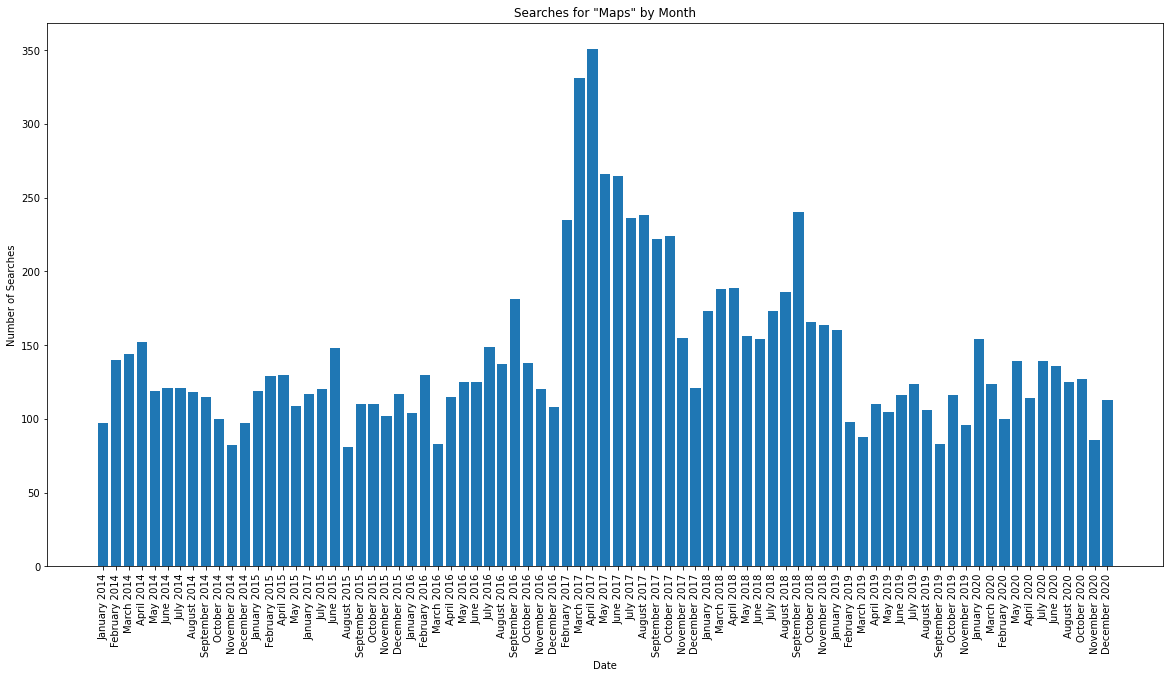

In [18]:
plt.figure(figsize=(20,10))
plt.bar('month_year', 'query_count', data = q1_df)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel ('Number of Searches')
plt.title('Searches for "Maps" by Month')

###Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

In [ ]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
params = {
    '$limit': 50000,
    'query_text':'fire', 'year':'2016'}

response_fire = requests.get(endpoint, params = params)
response_fire

In [ ]:
res_fire = response_fire.json()
res_fire

In [ ]:
q2_df = pd.DataFrame(res_fire)
q2_df

###Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [ ]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
params = {
    '$limit': 50000,
    '$where': 'query_count > 100'}

response_q3 = requests.get(endpoint, params = params)
response_q3

In [ ]:
res_q3 = response_q3.json()
res_q3

In [ ]:
q3_df = pd.DataFrame(res_q3)
q3_df

In [ ]:
q3_df.shape

###Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [ ]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
params = {
    '$limit': 50000,
    '$where': 'query_count > 100',
    'query_text':'codes'}

response_q4 = requests.get(endpoint, params = params)
response_q4

In [ ]:
res_q4 = response_q4.json()
res_q4

In [ ]:
q4_df = pd.DataFrame(res_q4)
q4_df.shape

##### Make an API request to pull back all the data from hubNashville (311) Service Requests (The full data set is too big for a single request so you will need to combine the output from multiple requests). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one)


In [ ]:
endpoint = 'https://data.nashville.gov/resource/7qhx-rexh.json'
params = {
    '$limit': 50000,
    'query_text': 'maps',
}

In [ ]:
hub_response = requests.get(endpoint, params = params)
hub_response

In [ ]:
hub_res = hub_response.json()
hub_res

In [ ]:
hub_df = pd.DataFrame(hub_res)


In [ ]:
df_list = []
for page in list(range(13)
    website_url = 'https://data.nashville.gov/resource/7qhx-rexh.json'+str(page*50)
    params = {'$limit': 50000}
    response = requests.get(website_url,
    json_dict = response.json()
    df = pd.DataFrame(json_dict['data'])
    df_list.append(df)